# NPTEL courses assignment score calculation and visualization
The objective of this notebook is to calculate the total assignment scores of NPTEL(National Programme for technology enhanced learning) courses and visualize weak and strong areas based on the assignment score and the corresponding week contents were taught. We need to load the assignment scores along with the week number in the following format in a text file.

WeekNo  AssignmentScore (Do not write this line)

0 ,90

1 ,88

2 ,90

. ...



Now we will import all the required packages for calculation and analysis. We will work with numpy and matplotlib primarily

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Now we will load the information contained in the text file which is placed in the same directory along with this jupyter notebook

In [2]:
assignments, scores = np.loadtxt('scores_dm.txt',unpack=True,delimiter=',')

We need to remove the week 0 assignment or the dummy assignment as it does not adds to the final score

In [3]:
assignments = np.delete(assignments,0)
scores = np.delete(scores,0)

No we need combine the assignments as well as the scores arrays together into a list of tuples for better viewing purpose

In [4]:
data = list(zip(assignments.astype(int),scores))

In [5]:
data

[(1, 90.0),
 (2, 80.0),
 (3, 90.0),
 (4, 80.0),
 (5, 50.0),
 (6, 90.0),
 (7, 100.0),
 (8, 90.0),
 (9, 88.0),
 (10, 78.0),
 (11, 100.0),
 (12, 78.0)]

Now we will sort the scores array in descending order as we want all the scores from high to low

In [6]:
temp_scores = np.copy(scores)
scores_in_order = sorted(temp_scores,reverse=True)

In [7]:
scores_in_order 

[100.0, 100.0, 90.0, 90.0, 90.0, 90.0, 88.0, 80.0, 80.0, 78.0, 78.0, 50.0]

Now we will calculate the final score we have recieved for our hard work in doing the assignments. But before that we need to find the best of 6 or best of 8 according to the length of our NPTEL course

NPTEL 8 week courses require us to calculate best of 6 assignment scores whereas 12 weeks courses require best of 8 assignment scores

In [8]:
avg = 0.0
if len(scores_in_order) is 8:
    best_of_6 = scores_in_order[:6]
    avg = np.average(best_of_6)
elif len(scores_in_order) is 12:
    best_of_8 = scores_in_order[:8]
    avg = np.average(best_of_8)

To calculate 25% of average of the necessary assignments

In [9]:
twentyFivePercent = (25/100)*avg

### Therefore our final score for the nptel course is

In [10]:
print('Final assignment score on certificate is {} out of 25'.format(twentyFivePercent))

Final assignment score on certificate is 22.75 out of 25


### Visalization of strong and weak areas weekwise.

Now its time to plot some graphs and analyse our strong and weak areas based on weeks. First of all lets plot a bar chart to visualize our performance over the weeks. It will allow us to visually see in which weeks topics we are not scoring well

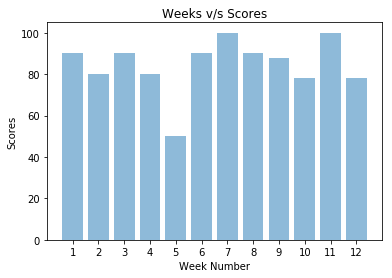

<Figure size 432x288 with 0 Axes>

In [11]:
plt.bar(assignments,scores,align='center',alpha=0.5)
plt.xticks(assignments)
plt.xlabel('Week Number')
plt.ylabel('Scores')
plt.title('Weeks v/s Scores')
plt.show()
plt.clf()
plt.gcf().clear()

Let us see in which week assingnments we have scored really well by arranging the weeks and scores in descending order os scores

In [12]:
import operator
data.sort(key = operator.itemgetter(1),reverse = True)

In [13]:
data

[(7, 100.0),
 (11, 100.0),
 (1, 90.0),
 (3, 90.0),
 (6, 90.0),
 (8, 90.0),
 (9, 88.0),
 (2, 80.0),
 (4, 80.0),
 (10, 78.0),
 (12, 78.0),
 (5, 50.0)]

In [14]:
assignments_sorted=[]
scores_sorted=[]
for i in data:
    a,b=i
    assignments_sorted.append(a)
    scores_sorted.append(b)

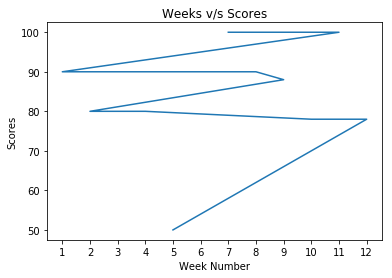

<Figure size 432x288 with 0 Axes>

In [15]:
plt.plot(assignments_sorted,scores_sorted)
plt.xticks(assignments_sorted)
plt.xlabel('Week Number')
plt.ylabel('Scores')
plt.title('Weeks v/s Scores')
plt.show()
plt.clf()

Here is a pie chart representstion of our performance over the weeks in the NPTEL course assignments

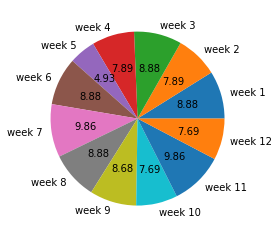

In [16]:
pie_labels=[]
for i in assignments.astype(int):
    pie_labels.append('week '+str(i))
    
plt.pie(scores,labels=pie_labels,autopct='%.2f')
plt.show()

So now we should prepare for the exam keeping in mind our week as well as strong areas or topics based on weeks. We need to study more in our week areas.